In [157]:
"""
This notebook studies the behaviour of simulator, how it generate pool data to test
"""

import copy
from sturdy.pools import generate_assets_and_pools
from sturdy.protocol import AllocateAssets
from sturdy.utils.yiop import yiop_allocation_algorithm
from sturdy.validator import simulator


assets_and_pools = generate_assets_and_pools()
synapse = AllocateAssets(assets_and_pools=copy.deepcopy(assets_and_pools))
allocations = yiop_allocation_algorithm(synapse=synapse)


In [15]:
%load_ext autoreload
%autoreload 2
import copy
import numpy as np
import pandas as pd
from sturdy.protocol import AllocateAssets
from sturdy.validator import simulator
from sturdy.pools import generate_assets_and_pools
from sturdy.utils.yiop import yiop_allocation_algorithm
# print(allocations)
# print(assets_and_pools)
assets_and_pools = generate_assets_and_pools(num_pools=2)
synapse = AllocateAssets(assets_and_pools=copy.deepcopy(assets_and_pools))
allocations = yiop_allocation_algorithm(synapse=synapse)
sim = simulator.Simulator()
sim.initialize()
sim.reset()
sim.init_data(init_assets_and_pools=copy.deepcopy(assets_and_pools), init_allocations=allocations)
sim.update_reserves_with_allocs()
sim.run()
sim.pool_history
pools = [pools for pools in sim.pool_history]

results = {}
pids = allocations.keys()
for pid in allocations.keys():
    results[f'borrow_amount_{pid}'] = [pools[pid]['borrow_amount'] for pools in sim.pool_history]
    results[f'borrow_rate_{pid}'] = [pools[pid]['borrow_rate'] for pools in sim.pool_history]
    results[f'rate_change_{pid}'] = [pools[pid].get('rate_change') for pools in sim.pool_history]
    results[f'noise_{pid}'] = [pools[pid].get('noise') for pools in sim.pool_history]
df = pd.DataFrame(results)
df['median_borrow_rate'] = df[[f'borrow_rate_{pid}' for pid in pids]].median(axis=1)
df['diff_rate_0'] = df['borrow_rate_0'] - df['median_borrow_rate']
df['diff_rate_1'] = df['borrow_rate_1'] - df['median_borrow_rate']
df['rate_change_0_'] = df['diff_rate_0'] * -0.1 + df['noise_0']

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,borrow_amount_0,borrow_rate_0,rate_change_0,noise_0,borrow_amount_1,borrow_rate_1,rate_change_1,noise_1,median_borrow_rate,diff_rate_0,diff_rate_1,rate_change_0_
0,0.750000,0.066198,NaN,NaN,0.800000,0.052539,NaN,NaN,0.059369,0.006830,-0.006830,NaN
1,0.750945,0.066256,0.001260,0.001943,0.796942,0.052491,-0.003823,-0.004506,0.059374,0.006883,-0.006883,0.001254
2,0.745141,0.065899,-0.007729,-0.007041,0.803238,0.052590,0.007900,0.007212,0.059244,0.006655,-0.006655,-0.007706
3,0.754816,0.066495,0.012985,0.013650,0.808697,0.052675,0.006797,0.006131,0.059585,0.006910,-0.006910,0.012960
4,0.772012,0.067554,0.022782,0.023473,0.838311,0.053139,0.036619,0.035928,0.060347,0.007207,-0.007207,0.022752
5,0.740303,0.065601,-0.041074,-0.040353,0.839057,0.053151,0.000890,0.000169,0.059376,0.006225,-0.006225,-0.040976
6,0.704744,0.063410,-0.048032,-0.047410,0.813071,0.052744,-0.030971,-0.031593,0.058077,0.005333,-0.005333,-0.047943
7,0.684595,0.062169,-0.028590,-0.028057,0.821271,0.052872,0.010085,0.009552,0.057521,0.004648,-0.004648,-0.028522
8,0.679452,0.061852,-0.007513,-0.007048,0.775955,0.052162,-0.055178,-0.055643,0.057007,0.004845,-0.004845,-0.007532
9,0.654510,0.060316,-0.036710,-0.036225,0.796782,0.052489,0.026841,0.026356,0.056402,0.003914,-0.003914,-0.036616


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
{'0': {'pool_id': '0', 'base_rate': 0.03, 'base_slope': 0.03, 'kink_slope': 0.473, 'optimal_util_rate': 0.8, 'borrow_amount': 0.8, 'reserve_size': 1.0}, '1': {'pool_id': '1', 'base_rate': 0.05, 'base_slope': 0.059, 'kink_slope': 0.723, 'optimal_util_rate': 0.75, 'borrow_amount': 0.85, 'reserve_size': 1.0}}


<Axes: >

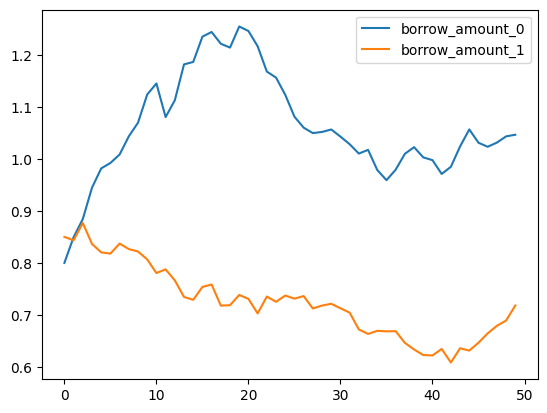

In [79]:
"""
How is initial allocation affect borrow_amount fluctuation over time?
"""
%load_ext autoreload
%autoreload 2
import copy
import json
import numpy as np
import pandas as pd
from sturdy.protocol import AllocateAssets
from sturdy.validator import simulator
from sturdy.pools import generate_assets_and_pools
from sturdy.utils.yiop import yiop_allocation_algorithm
# print(allocations)
# print(assets_and_pools)

def generate_assets_and_pools_and_persist(filename):
    assets_and_pools = generate_assets_and_pools(num_pools=2)
    with open(filename, 'w') as f:
        json.dump(assets_and_pools, f)

def load_assets_and_pools(filename):
    with open(filename, 'r') as f:
        return json.load(f)


# generate_assets_and_pools_and_persist('assets_and_pools__2_pools_2.json')
assets_and_pools = load_assets_and_pools('assets_and_pools__2_pools_2.json')
print(assets_and_pools['pools'])
synapse = AllocateAssets(assets_and_pools=copy.deepcopy(assets_and_pools))
# allocations = yiop_allocation_algorithm(synapse=synapse)
allocations = {'0': 1, '1': 0}

sim = simulator.Simulator(seed=0)
sim.initialize()
sim.reset()
sim.init_data(init_assets_and_pools=copy.deepcopy(assets_and_pools), init_allocations=allocations)
sim.update_reserves_with_allocs()
sim.run()
sim.pool_history
pools = [pools for pools in sim.pool_history]

results = {}
pids = allocations.keys()
for pid in allocations.keys():
    results[f'borrow_amount_{pid}'] = [pools[pid]['borrow_amount'] for pools in sim.pool_history]
    results[f'borrow_rate_{pid}'] = [pools[pid]['borrow_rate'] for pools in sim.pool_history]
    results[f'rate_change_{pid}'] = [pools[pid].get('rate_change') for pools in sim.pool_history]
    results[f'noise_{pid}'] = [pools[pid].get('noise') for pools in sim.pool_history]
df = pd.DataFrame(results)
df[['borrow_amount_0', 'borrow_amount_1']].plot()

In [95]:
%load_ext autoreload
%autoreload 2
import numpy as np
# import pandas as pd

# pd.DataFrame([item['2'] for item in simulator.pool_history])['borrow_amount'].hist(bins=100)

latest_pool_data = sim.pool_history[-1]
curr_borrow_rates = np.array(
    [pool["borrow_rate"] for _, pool in latest_pool_data.items()]
)
curr_borrow_amounts = np.array(
    [pool["borrow_amount"] for _, pool in latest_pool_data.items()]
)
curr_reserve_sizes = np.array(
    [pool["reserve_size"] for _, pool in latest_pool_data.items()]
)

median_rate = np.median(curr_borrow_rates)  # Calculate the median borrow rate
noise = sim.rng_state_container.normal(
    0, sim.stochasticity, len(curr_borrow_rates)
)  # Add some random noise
rate_changes = (
    -sim.reversion_speed * (curr_borrow_rates - median_rate) + noise
)  # Mean reversion principle
new_borrow_amounts = (
    curr_borrow_amounts + rate_changes * curr_borrow_amounts
)  # Update the borrow amounts
amounts = np.clip(
    new_borrow_amounts, 0, curr_reserve_sizes
)  # Ensure borrow amounts do not exceed reserves

print(curr_borrow_rates)
print(rate_changes)



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
[0.06664762 0.10312901 0.09251003 0.11012955 0.07398117 0.11524073
 0.09800082 0.07249837 0.06577871 0.03206204]
[-0.00299204 -0.00974734 -0.01884652  0.00235645 -0.02148961 -0.02671779
 -0.00559312 -0.00424357 -0.02607421  0.0080775 ]
